## Calculate Normalized Difference Water Index (NDWI) 

## Calculate NDWI

The Normalized Difference Water Index (NDWI) is used to monitor changes related to water content in water bodies, using green and NIR wavelengths, defined by McFeeters (1996):

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd21ea077007b78b7bf753498d4953991837cb26)

In [1]:
import geemap
import ee

ModuleNotFoundError: No module named 'geemap'

In [22]:
Map = geemap.Map()
Map

Map(center=[20, 0], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(children=(Togg…

In [16]:


images = geemap.landsat_timeseries(
    roi=roi, start_year=2005, end_year=2020, start_date='01-01', end_date='12-31'
)


## Extract surface water extent

In [17]:
water_images = ndwi_images.map(lambda img: img.gt(0).selfMask())

first_water = water_images.first()

Map.addLayer(first_water, {'palette': ['ocean']}, 'First Water')

AttributeError: 'Image' object has no attribute 'map'

## Calculate surface water areas

In [5]:
def cal_area(img):
    pixel_area = img.multiply(ee.Image.pixelArea()).divide(1e6)
    img_area = pixel_area.reduceRegion(
        **{
            'geometry': roi.geometry(),
            'reducer': ee.Reducer.sum(),
            'scale': 1000,
            'maxPixels': 1e12,
        }
    )
    return img.set({'water_area': img_area})

In [6]:
water_areas = water_images.map(cal_area)

NameError: name 'water_images' is not defined

In [8]:
water_stats = water_areas.aggregate_array('water_area').getInfo()
water_stats

NameError: name 'water_areas' is not defined

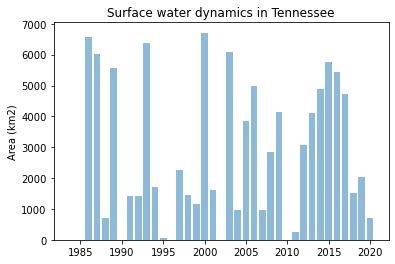

In [33]:
import matplotlib.pyplot as plt

x = list(range(1984, 2021))
y = [item.get('ndwi') for item in water_stats]

plt.bar(x, y, align='center', alpha=0.5)
# plt.xticks(y_pos, objects)
plt.ylabel('Area (km2)')
plt.title('Dinamica de agua de Cuerpo')

plt.show()

In [28]:
ndwi_images = images.map(
    lambda img: img.normalizedDifference(['Green', 'SWIR1']).rename('ndwi')
)

ndwi_palette = [
    '#ece7f2',
    '#d0d1e6',## Extract surface water extent

water_images = ndwi_images.map(lambda img: img.gt(0).selfMask())

first_water = water_images.first()

Map.addLayer(first_water, {'palette': ['blue']}, 'First Water')

## Calculate surface water areas

def cal_area(img):
    pixel_area = img.multiply(ee.Image.pixelArea()).divide(1e6)
    img_area = pixel_area.reduceRegion(
        **{
            'geometry': roi.geometry(),
            'reducer': ee.Reducer.sum(),
            'scale': 1000,
            'maxPixels': 1e12,
        }
    )
    return img.set({'water_area': img_area})

water_areas = water_images.map(cal_area)
    '#a6bddb',
    '#74a9cf',
    '#3690c0',
    '#0570b0',
    '#045a8d',
    '#023858',
]

first_ndwi = ndwi_images.first()

Map.addLayer(first_ndwi, {'palette': ndwi_palette}, 'First NDWI')

In [40]:
first_image = collection.first()

vis = {
    'bands': ['Red', 'Green', 'Blue'],
    'min': 0,
    'max': 4000,
    'gamma': [1, 1, 1]
}
## Calculate Normalized Difference Water Index (NDWI) 

ndwi_images = images.map(
    lambda img: img.normalizedDifference(['Green', 'SWIR1']).rename('ndwi')
)

ndwi_palette = [
    '#ece7f2',
    '#d0d1e6',
    '#a6bddb',
    '#74a9cf',
    '#3690c0',
    '#0570b0',
    '#045a8d',
    '#023858',
]

first_ndwi = ndwi_images.first()

Map.addLayer(first_ndwi, {'palette': ndwi_palette}, 'First NDWI')
Map.addLayer(first_image, vis, 'First image')

## Calculate NDWI

The Normalized Difference Water Index (NDWI) is used to monitor changes related to water content in water bodies, using green and NIR wavelengths, defined by McFeeters (1996):

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd21ea077007b78b7bf753498d4953991837cb26)

In [2]:
Map = geemap.Map()
Map
image = ee.Image('LANDSAT/LC08/C01/T1_SR/LC08_039035_20150724')
vis_params = {
    'bands': ['B5', 'B4', 'B3'],
    'min': 0,
    'max': 6000,
    'gamma': 1.4,
}
Map.addLayer(image, vis_params, 'image')
Map.centerObject(image, 8)
ndwi_image = image.normalizedDifference(['B3', 'B5'])


NameError: name 'geemap' is not defined